<a href="https://colab.research.google.com/github/Ayajo-31/stunting-rate-forecast/blob/main/Testing_ARIMA_for_Inlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

inflation_data = {
    2008: 3.8,
    2009: -0.4,
    2010: 1.6,
    2011: 3.2,
    2012: 6.1,
    2013: 7.6,
    2014: 7.2,
    2015: 8.2,
    2016: 10.2,
    2017: 15.3,
    2018: 9.5,
    2019: 10.3,
    2020: 13.3,
    2021: 11.0,
    2022: 18.8,
    2023: 24.6,
    2024: 33.2,
}

# Convert dictionary to DataFrame
df = pd.DataFrame(list(inflation_data.items()), columns=['year', 'inflation'])


In [ ]:
df.head()

,year,inflation
0,2008,3.8
1,2009,-0.4
2,2010,1.6
3,2011,3.2
4,2012,6.1


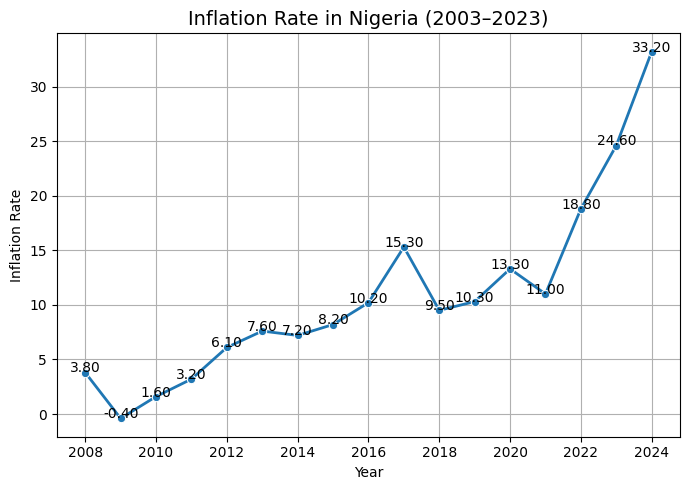

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
infplot = df.reset_index()

# Plot the line graph
plt.figure(figsize=(7, 5))
sns.lineplot(data=infplot, x="year", y="inflation", marker="o", linewidth=2)

# Add labels on each data point
for i in range(len(infplot)):
    plt.text(
        infplot["year"][i],
        infplot["inflation"][i] + 0.005,  # Slightly above the point
        f'{infplot["inflation"][i]:.2f}',  # Format as 0.38 etc.
        ha='center',
        fontsize=10,
        color='black'
    )

plt.title("Inflation Rate in Nigeria (2003–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from statsmodels.tsa.stattools import adfuller

# Run the ADF test
result = adfuller(df["inflation"])

# Display results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: 1.3293303748561014
p-value: 0.9967682141319727
Critical Value (1%): -3.9240193847656246
Critical Value (5%): -3.0684982031250003
Critical Value (10%): -2.67389265625


In [ ]:
# First-order differencing
df_diff = df.diff().dropna()  # Subtract each value from the previous one


# ADF test on the differenced data
result_diff = adfuller(df_diff["inflation"])

# Print results
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value:", result_diff[1])
for key, value in result_diff[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic (Differenced): -3.3791904779215507
p-value: 0.011689055788389614
Critical Value (1%): -3.9644434814814815
Critical Value (5%): -3.0849081481481484
Critical Value (10%): -2.6818144444444445


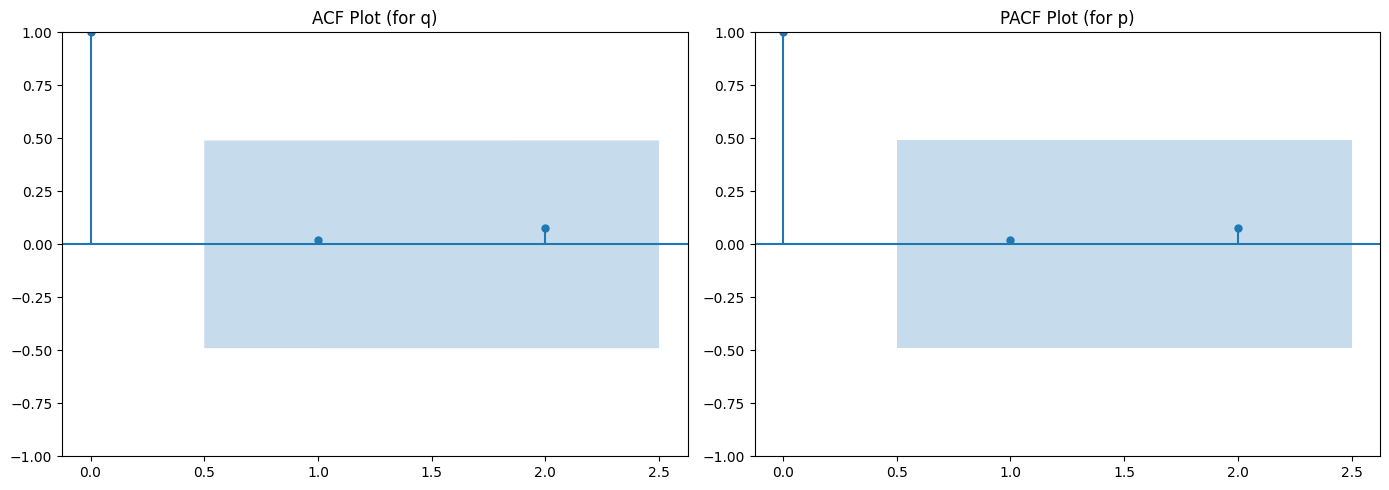

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(df_diff['inflation'], lags=2, ax=axes[0])
axes[0].set_title("ACF Plot (for q)")

plot_pacf(df_diff['inflation'], lags=2, ax=axes[1])
axes[1].set_title("PACF Plot (for p)")

plt.tight_layout()
plt.show()

In [ ]:
# Fit ARIMA (1,1,1)

from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(df["inflation"], order=(1,1,1))
model1_fit = model1.fit()

print(model1_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              inflation   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -44.874
Date:                Sun, 22 Jun 2025   AIC                             95.747
Time:                        20:24:50   BIC                             98.065
Sample:                             0   HQIC                            95.866
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8886      0.800      1.111      0.267      -0.679       2.456
ma.L1         -0.6699      1.047     -0.640      0.522      -2.723       1.383
sigma2        15.6389      7.409      2.111      0.0

In [ ]:
print("Original index length:", len(df_diff.index))
print("Fitted values length:", len(model1_fit.fittedvalues))
print("Fitted values:", model1_fit.fittedvalues)

Original index length: 16
Fitted values length: 17
Fitted values: 0      0.000000
1      3.800025
2     -1.839419
3      1.249827
4      3.358770
5      6.867534
6      8.445414
7      7.676450
8      8.738316
9     10.998546
10    16.950935
11     9.337145
12    10.365867
13    14.000175
14    10.966111
15    20.482926
16    26.995716
dtype: float64


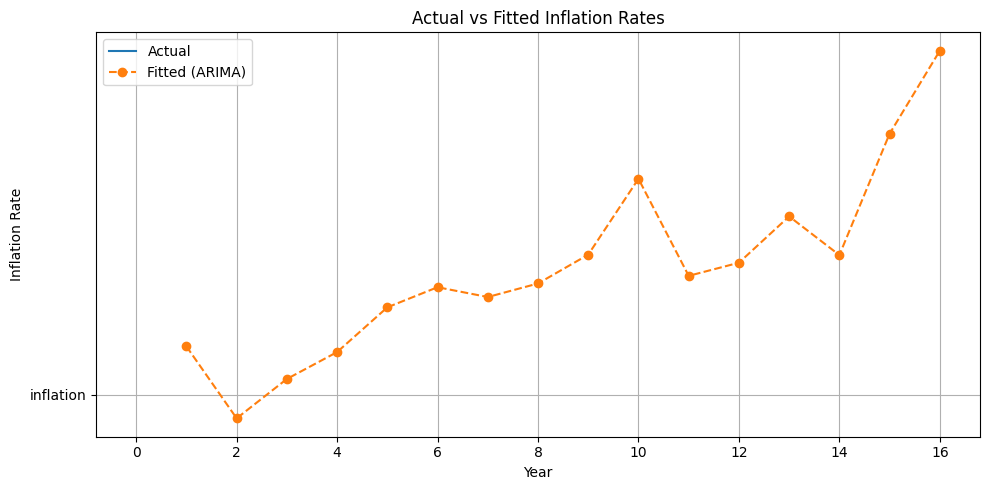

In [ ]:
# Drop the first dummy value
fitted_clean = model1_fit.fittedvalues[1:]

# Plot actual vs fitted
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot('inflation', label="Actual")
plt.plot(fitted_clean, label="Fitted (ARIMA)", linestyle="--", marker='o')
plt.title("Actual vs Fitted Inflation Rates")
plt.ylabel("Inflation Rate")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

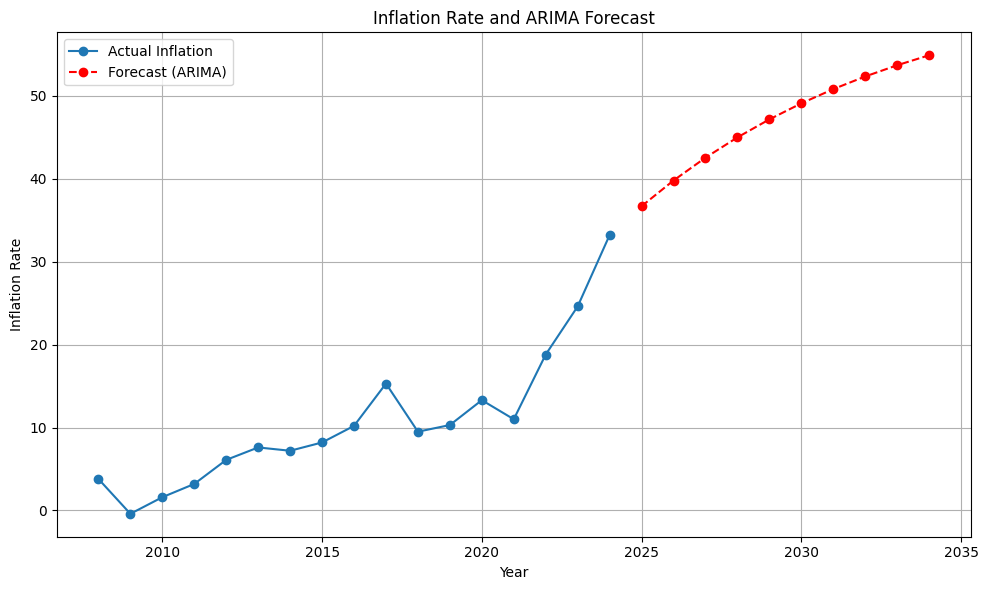

In [ ]:
# prompt: Create the forecast into 10 futrue timespans, and give the forecast a different color

# Create the forecast into 10 future timespans, and give the forecast a different color
forecast_steps = 10
forecast = model1_fit.forecast(steps=forecast_steps)

# Create a date index for the forecast
last_year = df['year'].iloc[-1]
forecast_years = pd.RangeIndex(start=last_year + 1, stop=last_year + 1 + forecast_steps, step=1)

# Plot actual data
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['inflation'], label='Actual Inflation', marker='o')

# Plot forecast
plt.plot(forecast_years, forecast, label='Forecast (ARIMA)', linestyle='--', marker='o', color='red') # Different color

plt.title('Inflation Rate and ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: a code that shows a table of forecasted inflation rate values

# Display the forecast values in a table
forecast_table = pd.DataFrame({'Year': forecast_years, 'Forecasted Inflation Rate (%)': forecast})
print("\nForecasted Inflation Rates:")
print(forecast_table.to_string(index=False))


Forecasted Inflation Rates:
 Year  Forecasted Inflation Rate (%)
 2025                      36.685501
 2026                      39.782702
 2027                      42.534862
 2028                      44.980420
 2029                      47.153532
 2030                      49.084550
 2031                      50.800444
 2032                      52.325181
 2033                      53.680056
 2034                      54.883991
